<a href="https://colab.research.google.com/github/AY0ungKim/clustering_project/blob/main/UMAP_STUDY_0407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. 차원축소(Dimensionality Reduction)**

1) 정의: 많은 Feature로 구성된 다차원 데이터세트의 차원을 축소해 새로운 차원의 데이터로 재생성하는 과정

2) 목적: 차원이 증가하면 그것을 표현하기 위한 데이터 양이 기하급수적으로 증가하는 **curse of dimension**을 방지하기 위함

3) 종류:
- feature 선택: 특정 feature에 종속성이 강한 불필요한 feature는 제거하는 것


- feature 추출: 기존 feature를 저차원의 중요 feature로 압축해서 추출하는 것


- 주로 사용되는 방법으로 **PCA, UMAP, t_SNE**가 있는데, 최근에는 **UMAP**이 가장 좋은 방법이라는 합의가 이루어지고 있음

출처 (https://velog.io/@stella_y/%EC%B0%A8%EC%9B%90-%EC%B6%95%EC%86%8C-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EC%9D%84-%EB%B9%84%EA%B5%90%ED%95%B4%EB%B3%B4%EC%9E%90-PCA-T-sne-UMAP)

---




## **2. UMAP (Uniform Manifold Approximation and Projection**


- **UMAP이란?**: high dimension space 에서의 데이터를 graph로 만들고, low dimension 으로 graph projection하는 방식

> 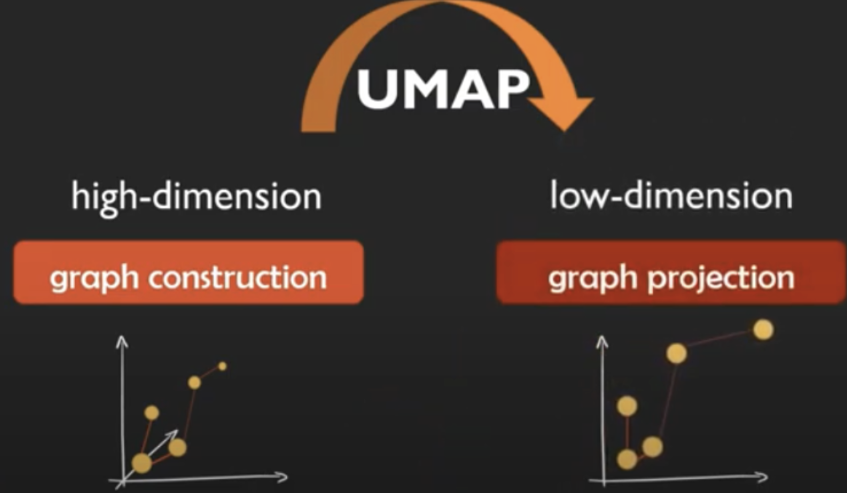


- 수학적으로 모든 알고리즘이 증명되어 있음 (이론적으로 자세히 아는 것은 정신건강에 해롭다고 함...)

<br/>

- 간단한 원리 (https://m.blog.naver.com/myohyun/222421460444 참고)

>> 각 data point에 서로 가까운 포인트끼리 simplex 복합체를 만듦 (점, 선, 삼각형, 사각형 등등)

>> 특히, 만약 0 , 1 simplices를 활용하면 그래프처럼 표현할 수 있음


>> 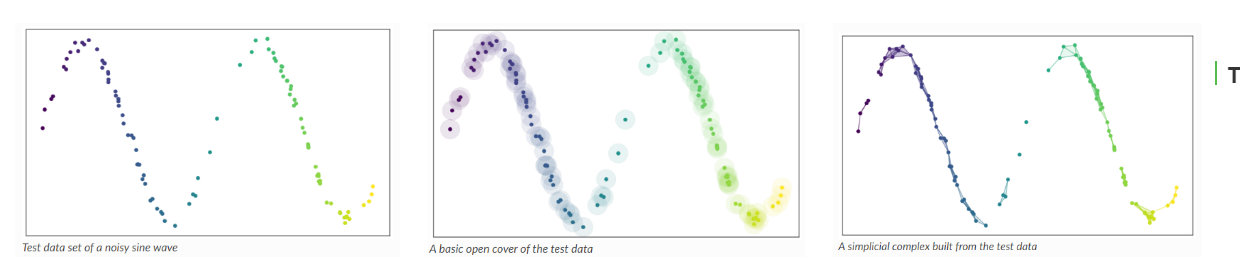


- Clustering에 적용: UMAP을 사용하여 고차원 데이터를 저차원으로 축소한 다음, 저차원 표현을 기반으로 클러스터링 알고리즘을 적용



---



(예시)

**1) 예시 데이터 생성** (성별, 나이를 포함한 30개의 feature를 갖고 있는 데이터 생성 + 1000개의 행)

In [1]:
import numpy as np

# 데이터 포인트 개수
num_samples = 1000

# 환자의 성별 데이터 생성 (0: 여성, 1: 남성)
gender = np.random.choice([0, 1], size=num_samples)

# 환자의 연령 데이터 생성 (20세부터 80세까지 균일분포)
age = np.random.randint(20, 81, size=num_samples)

# 기타 특성 데이터 생성 (예시로 랜덤하게 생성)
other_features = np.random.rand(num_samples, 28)  # 28개의 추가 특성을 랜덤하게 생성

# 데이터 합치기 (각 열을 세로로 합침)
data = np.hstack((gender.reshape(-1, 1), age.reshape(-1, 1), other_features))

# 데이터 확인
print(data.shape)  # 데이터 shape 확인
print(data[:5])    # 처음 5개의 데이터 출력

(1000, 30)
[[1.00000000e+00 4.80000000e+01 2.04260392e-01 8.63068505e-02
  7.66611463e-01 7.03263817e-01 1.15374950e-01 1.98529371e-01
  3.21127966e-01 9.39831757e-01 2.26926305e-01 5.09494629e-01
  4.46671331e-01 6.46473279e-01 7.75904040e-01 6.02550367e-01
  5.73338597e-01 6.65779506e-01 9.12323111e-02 9.81263913e-01
  1.22317356e-01 4.28078545e-01 7.98816046e-01 3.23341061e-01
  2.29537827e-01 4.13802253e-01 9.31300485e-01 6.66971057e-01
  1.61461730e-01 1.75544900e-01]
 [0.00000000e+00 6.90000000e+01 9.91548164e-01 8.07181156e-01
  6.98465300e-01 1.59859797e-01 1.64589653e-01 9.16407866e-01
  6.75067492e-01 6.35944412e-02 2.41526243e-01 1.33739156e-01
  9.09730495e-01 6.38434278e-01 3.11647998e-01 7.92300145e-01
  5.73325132e-01 2.08509699e-01 9.85824162e-02 2.13110051e-01
  7.59522272e-01 9.29831335e-01 6.17109881e-01 1.59434013e-01
  5.36488658e-01 6.60224989e-01 6.74179726e-01 8.44665899e-01
  7.42941742e-01 6.84253076e-01]
 [1.00000000e+00 6.50000000e+01 8.32710334e-01 3.401120

In [3]:
#umap 모듈 설치
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.9 MB/s eta 0:00:00


**2) 차원수 설정** n_components (hyperparameter인 n_components를 적절히 설정하여 축소할 차원의 수를 결정)


- top2vec 이라는 논문에서 최적의 parameter를 제안한 바 있음(n_neighbor =15, min_dist=0.25)     
<br/>



-중요한 hyperparameter

- **n_neighbors**: 각 데이터 포인트의 이웃을 결정하는데 사용되는 이웃의 수. 이 값이 클수록 global structure에 집중하고, 작을수록 local structure에 집중 (default = 15)

- **min_dist**: 저차원공간에서 포인트간의 최소 거리. 작은 값일수록 저차원에서 더 촘촘이 포인트들이 무리짓고, 클수록 포인트들이 상대적으로 느슨하게 퍼져있게 됨, (default = 0.1)

<br/>

-그 외
- **n_components**: UMAP을 적용하여 축소할 차원 수. 주로 2차원 또는 3차원으로 설정하여 시각화에 사용

- metric: 거리를 계산할 때 사용할 거리 측정 방법을 선택. 기본적으로는 유클리드 거리(euclidean)가 사용되지만, 맨하탄 거리(manhattan), 코사인 유사도(cosine similarity) 등을 사용할 수도 있음.

- learning_rate: UMAP이 학습하는 속도. 높은 학습률은 빠른 수렴을 유도할 수 있지만, 너무 높으면 수렴에 실패할 수 있음.

- n_epochs: 학습에 사용되는 반복 횟수. 더 많은 에포크를 사용하면 더 나은 결과를 얻을 수 있지만, 더 많은 계산 비용이 소요됨.

- init: 초기화 방법. 'spectral'은 고유값 분해(eigen decomposition)를 사용하여 초기화하고, 'random'은 무작위 초기화를 사용.

- random_state: UMAP의 무작위성을 제어하기 위한 시드 값.

In [4]:
import umap.umap_ as umap

umap_model = umap.UMAP(n_components=2)  # 저차원으로 축소할 차원 수 설정
umap_result = umap_model.fit_transform(data)  # 데이터에 UMAP을 적용하여 저차원으로 투영

**3) UMAP으로 축소된 데이터에 클러스터링 알고리즘을 적용**.

일반적으로 k-means, DBSCAN, 혹은 기타 클러스터링 알고리즘을 사용할 수 있음

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  # 클러스터 개수 설정
clusters = kmeans.fit_predict(umap_result)  # UMAP 결과에 k-means 클러스터링 적용

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


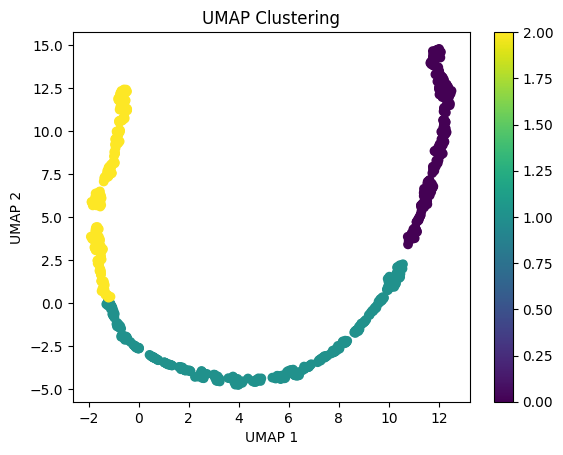

In [6]:
import matplotlib.pyplot as plt


plt.scatter(umap_result[:, 0], umap_result[:, 1], c=clusters, cmap='viridis')
plt.title('UMAP Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar()
plt.show()

성능 평가하기 (ing..)

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

svc = LinearSVC(dual=False, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(
    data,  labelcode , test_size=0.2, random_state=42)
svc = LinearSVC(dual=False, random_state=123)

pipeline = Pipeline([("umap", umap),
                     ("svc", svc)])
params_grid_pipeline = {"umap__n_neighbors": [5, 20],
                        "umap__n_components": [15, 25, 50],
                        "svc__C": [10**k for k in range(-3, 4)]}

clf_pipeline = GridSearchCV(pipeline, params_grid_pipeline)
clf_pipeline.fit(X_train, y_train)
print("Accuracy on the test set with UMAP transformation: {:.3f}".format(
    clf_pipeline.score(X_test, y_test)))

NameError: name 'labelcode' is not defined